# A Lightweight Concept Drift Detection and Adaptation Framework for IoT Data Streams
This is the code for the paper entitled "**A Lightweight Concept Drift Detection and Adaptation Framework for IoT Data Streams**" accepted in IEEE Internet of Things Magazine.  
Authors: Li Yang (lyang339@uwo.ca) and Abdallah Shami (Abdallah.Shami@uwo.ca)  
Organization: The Optimized Computing and Communications (OC2) Lab, ECE Department, Western University

**Notebook 2: Static machine learning algorithms**  
Aims:  
&nbsp; 1): Find the best performing static machine learning algorithm by considering both accuracy and time  
&nbsp; 2): Obtain the optimized learner using hyperparameter optimization techniques  

In [ ]:
 from google.colab import drive
 drive.mount('/content/drive')

Mounted at /content/drive


## Import libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
import lightgbm as lgb
import time
import warnings
warnings.filterwarnings("ignore")

## Read the NSL-KDD dataset

In [ ]:
#Read the training and test set
#df1 = pd.read_csv("NSL_KDD_binary_train.csv")
#df2 = pd.read_csv("NSL_KDD_binary_test.csv")

In [ ]:
#Read the training and test set
#df1 = pd.read_csv("/content/drive/MyDrive/NSL_KDD_binary_train.csv")
#df2 = pd.read_csv("/content/drive/MyDrive/NSL_KDD_binary_test.csv")
df1 = pd.read_csv("/content/drive/MyDrive/IoT_Dataset_ID20.csv")

In [ ]:
df1

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,56255,9020,6,149,0,3,0.0,2806.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,74.5,0.707107,75.0,74.0,1
1,443,43238,6,179,1,1,1441.0,1441.0,1441.0,1441.0,...,0,0.0,0.0,0.0,0.0,179.0,0.000000,179.0,179.0,1
2,52727,9020,6,119,1,1,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,119.0,0.000000,119.0,119.0,1
3,9020,52717,6,74,0,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,74.0,0.000000,74.0,74.0,1
4,5305,554,6,2933,0,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,2933.0,0.000000,2933.0,2933.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62572,443,51875,6,113,1,1,1448.0,1448.0,1448.0,1448.0,...,0,0.0,0.0,0.0,0.0,113.0,0.000000,113.0,113.0,1
62573,48920,443,6,79,0,2,0.0,0.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,79.0,0.000000,79.0,79.0,1
62574,9020,49784,6,321,3,1,2806.0,1388.0,1388.0,30.0,...,0,0.0,0.0,0.0,0.0,107.0,31.575307,130.0,71.0,0
62575,8281,40962,6,874,0,2,0.0,346.0,0.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1


In [ ]:
df1.dtypes


Src_Port           int64
Dst_Port           int64
Protocol           int64
Flow_Duration      int64
Tot_Fwd_Pkts       int64
                  ...   
Idle_Mean        float64
Idle_Std         float64
Idle_Max         float64
Idle_Min         float64
Label              int64
Length: 80, dtype: object

In [ ]:
# X_train = df1.iloc[:, :-1].values
# y_train = df1.iloc[:, -1].values
# X_test = df2.iloc[:, :-1].values
# y_test = df2.iloc[:, -1].values
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [ ]:
#X_test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 0,shuffle=False)

## Training  static machine learning algorithm:
###  LightGBM

[LightGBM] [Info] Number of positive: 37245, number of negative: 6558
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096917 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12144
[LightGBM] [Info] Number of data points in the train set: 43803, number of used features: 64
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.850284 -> initscore=1.736832
[LightGBM] [Info] Start training from score 1.736832
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2828
           1       1.00      1.00      1.00     15946

    accuracy                           1.00     18774
   macro avg       1.00      0.99      1.00     18774
weighted avg       1.00      1.00      1.00     18774

Accuracy: 0.9979226589964845
Precision: 0.9978093509419791
Recall: 0.9997491533927003


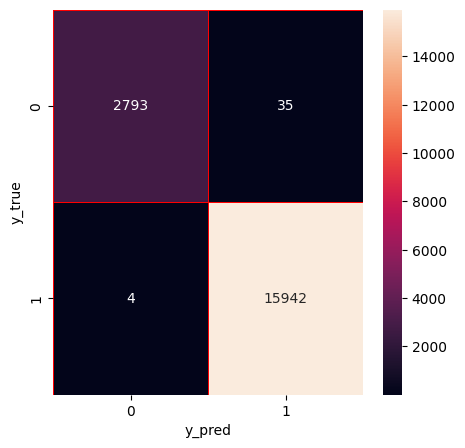

CPU times: user 4.02 s, sys: 36.2 ms, total: 4.05 s
Wall time: 9.39 s


In [ ]:
%%time
# LightGBM algorithm
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

Considering both accuracy and execution time, **LightGBM** performs the best among the five algorithms:  
Accuracy: 99.938%, time: 0.6s.  

# Hyperparameter optimization
Tune the hyperparameters of LightGBM to obtain optimal accuracy.

#### Optimize LightGBM by Bayesian Optimization with Tree-structured Parzen Estimator (BO-TPE)

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']),
        'max_depth': int(params['max_depth']),
        'learning_rate': abs(float(params['learning_rate'])),
        "num_leaves": int(params['num_leaves']),
        "min_child_samples": int(params['min_child_samples']),
    }
    clf = lgb.LGBMClassifier( **params)
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    score = accuracy_score(y_test,prediction)
    return {'loss':-score, 'status': STATUS_OK }

# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 50, 500, 20),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "learning_rate":hp.uniform('learning_rate', 0, 1),
    "num_leaves":hp.quniform('num_leaves',100,2000,100),
    "min_child_samples":hp.quniform('min_child_samples',10,50,5),
}

# Detect the optimal hyperparameter values
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50)
print("LightGBM: Hyperopt estimated optimum {}".format(best))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Number of positive: 37245, number of negative: 6558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.064526 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12142
[LightGBM] [Info] Number of data points in the train set: 43803, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.850284 -> initscore=1.736832
[LightGBM] [Info] Start training from score 1.736832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

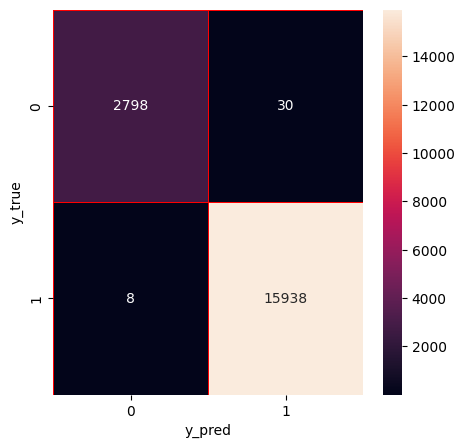

In [10]:
# Use the optimal hyperparameter values to train the optimized LightGBM model
clf = lgb.LGBMClassifier(max_depth=47, learning_rate= 0.7004699923340232, n_estimators = 200,
                         num_leaves = 1700, min_child_samples = 25)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

#### Optimize LightGBM by particle swarm optimization (PSO)

In [11]:
!pip install Optunity

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 14.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for Optunity: filename=Optunity-1.1.1-py3-none-any.whl size=72029 sha256=0271039e603ccc7d9431b72be9e933e7a18eb7b575e766c557ac2f40712b3d81
  Stored in directory: /root/.cache/pip/wheels/83/98/40/b9956c3386a045f035f9edbf894edd04713db92f29fb58a225
Successfully built Optunity


In [12]:
#PSO
import optunity
import optunity.metrics

# Define the hyperparameter configuration space
search = {
    'n_estimators': [50, 500],
    'max_depth': [5, 50],
    'learning_rate': (0, 1),
    "num_leaves":[100, 2000],
    "min_child_samples":[10, 50],
         }
# Define the objective function
def performance(n_estimators=None, max_depth=None,learning_rate=None,num_leaves=None,min_child_samples=None):
    clf = lgb.LGBMClassifier(n_estimators=int(n_estimators),
                                   max_depth=int(max_depth),
                                   learning_rate=float(learning_rate),
                                   num_leaves=int(num_leaves),
                                   min_child_samples=int(min_child_samples),
                                  )
    clf.fit(X_train,y_train)
    prediction = clf.predict(X_test)
    score = accuracy_score(y_test,prediction)
    return score

# Detect the optimal hyperparameter values
optimal_configuration, info, _ = optunity.maximize(performance,
                                                  solver_name='particle swarm',
                                                  num_evals=50,
                                                   **search
                                                  )
print(optimal_configuration)
print("Accuracy:"+ str(info.optimum))

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

[LightGBM] [Info] Number of positive: 37245, number of negative: 6558
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.038308 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 12142
[LightGBM] [Info] Number of data points in the train set: 43803, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.850284 -> initscore=1.736832
[LightGBM] [Info] Start training from score 1.736832
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain:

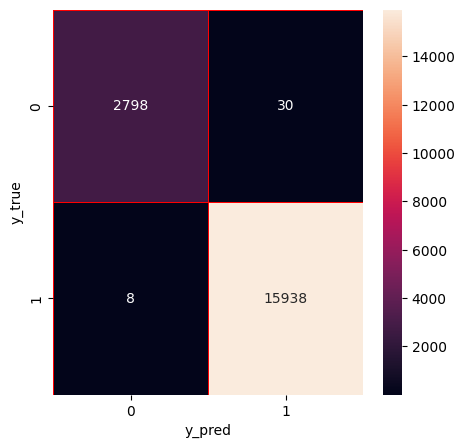

In [13]:
clf = lgb.LGBMClassifier(max_depth=7, learning_rate= 0.55322265625, n_estimators = 249,
                         num_leaves = 609, min_child_samples = 40)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

After hyperparameter optimization, the accuracy of LightGBM can be slightly improved from 99.938% to 99.943%. It is not much difference for IoT ID20 Dataset

### Save and load the optimized model

In [14]:
import joblib
# Output a pickle file to save the trained model
joblib.dump(clf, 'Optimized_lightGBM.pkl')

['Optimized_lightGBM.pkl']

In [15]:
# The trained model can be loaded directly for future testing
savestkrf = joblib.load('Optimized_lightGBM.pkl')

In [16]:
y_pred = savestkrf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 2798    30]
 [    8 15938]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2828
           1       1.00      1.00      1.00     15946

    accuracy                           1.00     18774
   macro avg       1.00      0.99      1.00     18774
weighted avg       1.00      1.00      1.00     18774

0.9979759241504208


However, the accuracy is still at a low level. A model with the accuracy of 80% cannot detect attacks accurately.

## Checking if there is some drift

Changing train and test data percentages

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.1, test_size = 0.9, random_state = 0,shuffle=False)

[LightGBM] [Info] Number of positive: 5311, number of negative: 946
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002814 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 9955
[LightGBM] [Info] Number of data points in the train set: 6257, number of used features: 63
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.848809 -> initscore=1.725293
[LightGBM] [Info] Start training from score 1.725293
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      8440
           1       1.00      1.00      1.00     47880

    accuracy                           1.00     56320
   macro avg       1.00      0.99      0.99     56320
weighted avg       1.00      1.00      1.00     56320

Accuracy: 0.9964488636363636
Precision: 0.9963977845333778
Recall: 0.9994360902255639


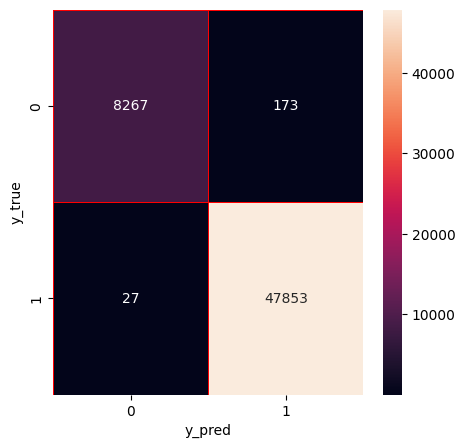

In [18]:
# LightGBM algorithm
import lightgbm as lgb
classifier = lgb.LGBMClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print(classification_report(y_test,y_pred))
print("Accuracy: "+ str(accuracy_score(y_test, y_pred)))
print("Precision: "+str(precision_score(y_test, y_pred)))
print("Recall: "+str(recall_score(y_test, y_pred)))

# Plot the confusion matrix
cm=confusion_matrix(y_test,y_pred)
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidth=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

### Monitor how the accuracy changes over time

In [19]:
# Record the real-time accuracy based on timestamp/sample index
acc = []
acc_sum = 0
for i in range(0, len(y_test)):
    if y_test[i] == y_pred[i]:
        acc_sum = acc_sum + 1
    accuracy = acc_sum/(i+1)
    acc.append(accuracy)

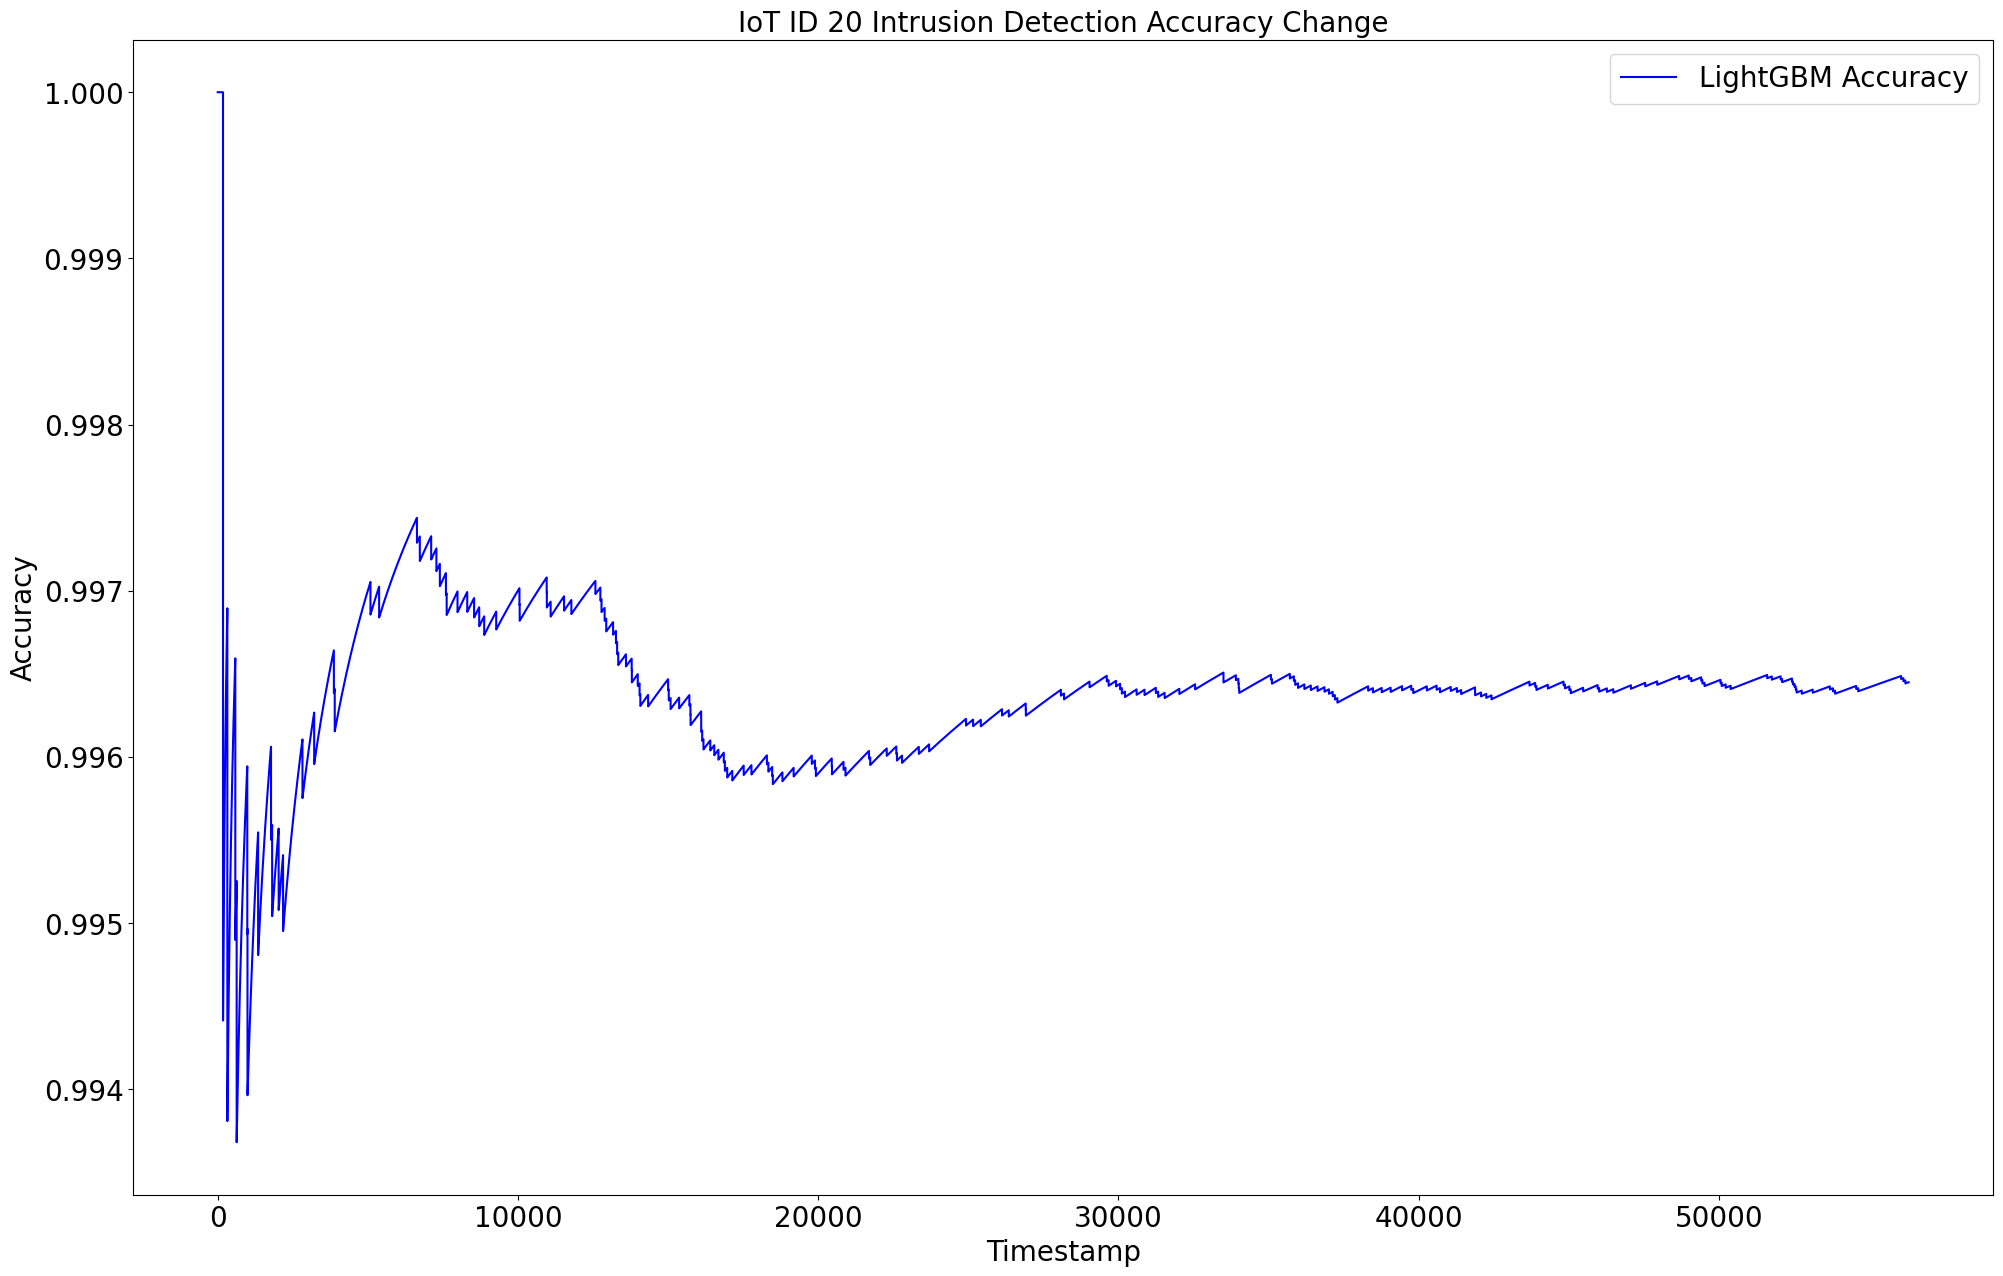

In [20]:
# Plot the accuracy changes
plt.rcParams.update({'font.size': 20})
plt.figure(1,figsize=(24,15))
plt.clf()
plt.plot(acc,'-b',label='LightGBM Accuracy')

#plt.scatter(len(df1)-len(X_train),acc[len(X_test)-len(df1)],s=100,c='r')
#plt.text(len(df1)-len(X_train),acc[len(X_test)-len(df2)]+0.0005, 'test set starts', c='r')

plt.legend(loc='best')
plt.title('IoT ID 20 Intrusion Detection Accuracy Change', fontsize=20)
plt.xlabel('Timestamp')
plt.ylabel('Accuracy')

plt.draw()

In [21]:
# Record the real-time precision based on timestamp/sample index
precision = []
true_positives = 0
false_positives = 0

for i in range(0, len(y_test)):
    if y_pred[i] == 1 and y_test[i] == 1:
        true_positives += 1
    elif y_pred[i] == 1 and y_test[i] == 0:
        false_positives += 1

    if true_positives + false_positives == 0:
        current_precision = 1  # To handle the case where there are no positive predictions made yet
    else:
        current_precision = true_positives / (true_positives + false_positives)

    precision.append(current_precision)

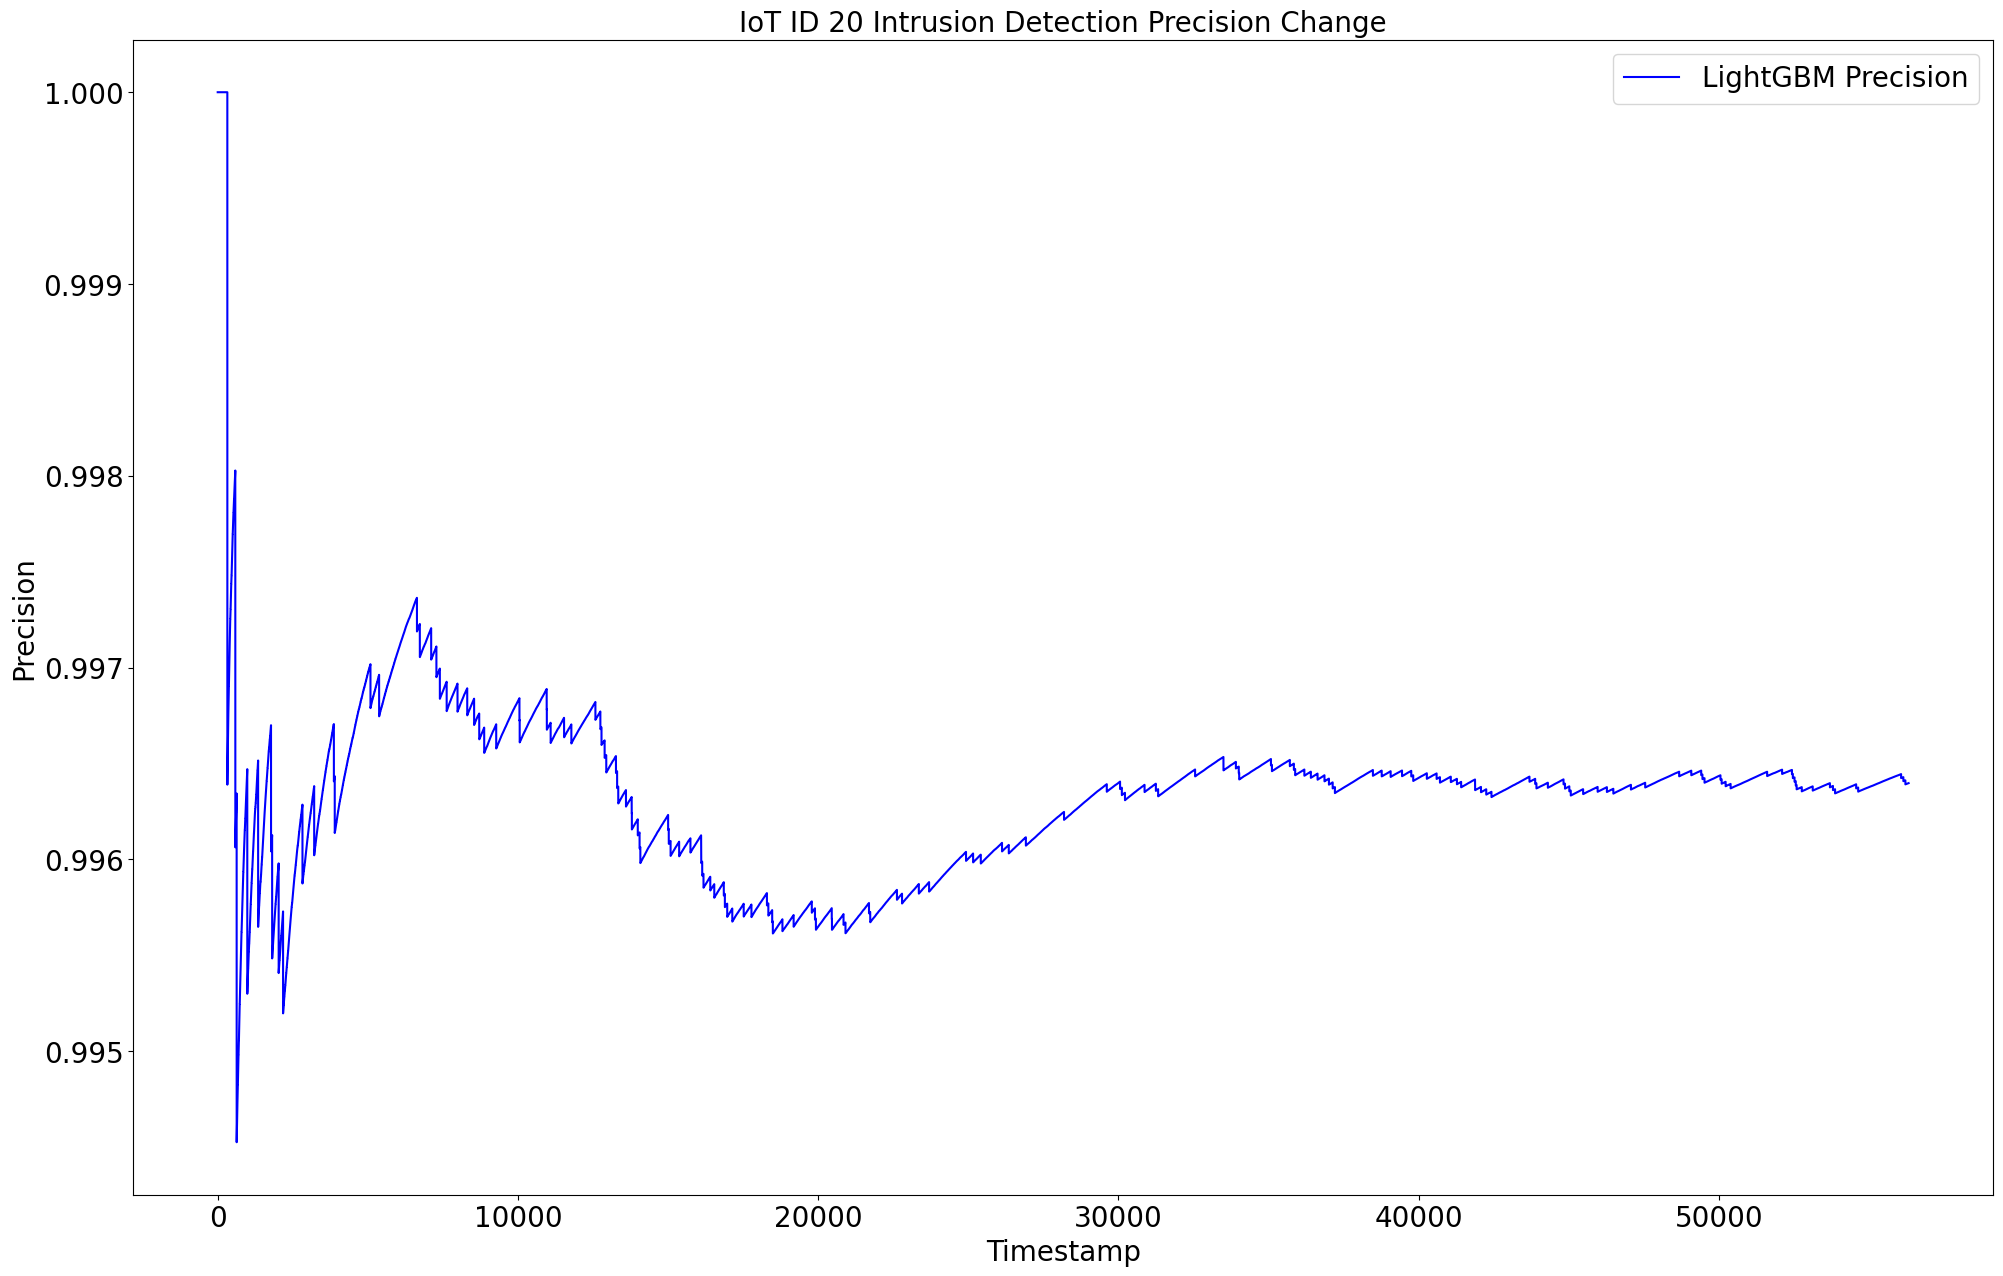

In [22]:
# Plot the precision changes
plt.rcParams.update({'font.size': 20})
plt.figure(1,figsize=(24,15))
plt.clf()
plt.plot(precision,'-b',label='LightGBM Precision')

#plt.scatter(len(df1)-len(X_train),acc[len(X_test)-len(df2)],s=100,c='r')
#plt.text(len(df1)-len(X_train),acc[len(X_test)-len(df2)]+0.0005, 'test set starts', c='r')

plt.legend(loc='best')
plt.title('IoT ID 20 Intrusion Detection Precision Change', fontsize=20)
plt.xlabel('Timestamp')
plt.ylabel('Precision')

plt.draw()

In [23]:
recall = []
true_positives = 0
false_negatives = 0

for i in range(0, len(y_test)):
    if y_pred[i] == 1 and y_test[i] == 1:
        true_positives += 1
    elif y_pred[i] == 0 and y_test[i] == 1:
        false_negatives += 1

    if true_positives + false_negatives == 0:
        current_recall = 1  # To handle the case where there are no positive instances in the actual data yet
    else:
        current_recall = true_positives / (true_positives + false_negatives)

    recall.append(current_recall)

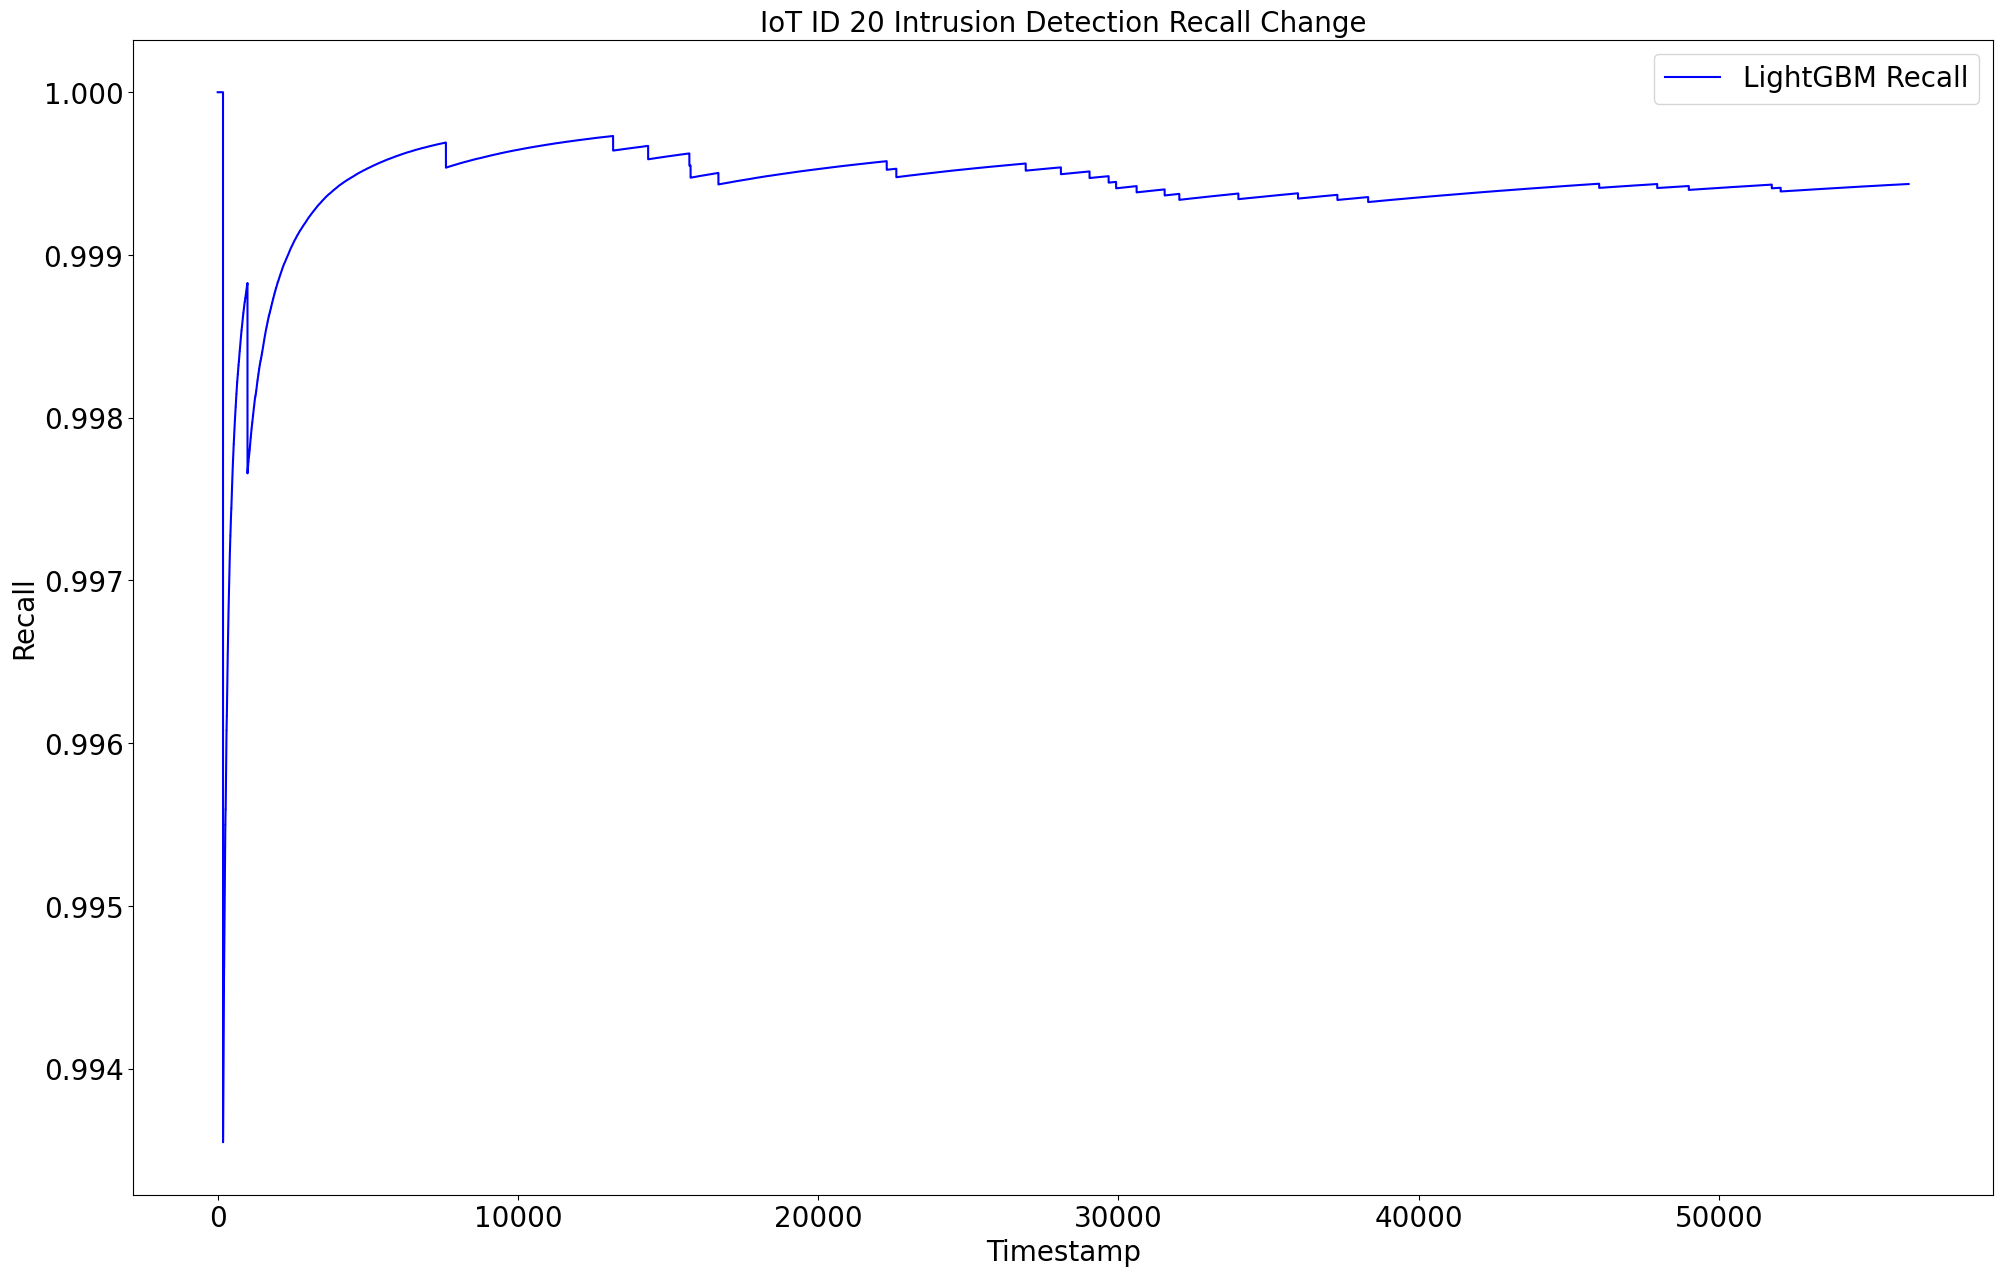

In [24]:
# Plot the precision changes
plt.rcParams.update({'font.size': 20})
plt.figure(1,figsize=(24,15))
plt.clf()
plt.plot(recall,'-b',label='LightGBM Recall')

#plt.scatter(len(df1)-len(X_train),acc[len(X_test)-len(df2)],s=100,c='r')
#plt.text(len(df1)-len(X_train),acc[len(X_test)-len(df2)]+0.0005, 'test set starts', c='r')

plt.legend(loc='best')
plt.title('IoT ID 20 Intrusion Detection Recall Change', fontsize=20)
plt.xlabel('Timestamp')
plt.ylabel('Recall')

plt.draw()